# Credit Card Default Prediction Using Machine Learning: A CRISP-DM Case Study

**Author:** Monica Flores Terroba

**Course:** Applied Data Science Capstone  
**Institution:** Coursera / IBM  
**Date:** April 3rd 2025

---

This project aims to develop a machine learning model to predict whether a customer will default on their credit card payment in the upcoming month. Using the CRISP-DM methodology, we go through all six stages: Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation, and Deployment.

The model is trained and evaluated using the "Default of Credit Card Clients" dataset provided by the UCI Machine Learning Repository.

---


### Step 1: Business Understanding

#### 🎯 Business Objective
The financial institution aims to **predict whether a client will default on their credit card payment in the next month**, in order to **mitigate financial risk** and **proactively adjust credit policies**.

#### 👤 Target User
The primary users of this model are the **Risk and Credit Department analysts**, who need to evaluate client behavior and adjust credit limits or contract conditions based on predicted default risk.

#### 💢 Current Situation
Currently, credit decisions are based on traditional scoring systems and heuristics, which may fail to detect non-linear patterns or temporal behavior in financial data.

#### ✅ Definition of Success
A successful model should:
- **Accurately identify high-risk clients**, reducing losses due to late or missed payments.
- Help optimize the client portfolio by adjusting credit limits based on predicted risk.

#### 📏 Success Metrics
- **Technical Output Metrics**:
  - Accuracy, Precision, Recall, F1-Score, ROC-AUC.
- **Business Outcome Metrics**:
  - Reduction in monthly overall default rate.
  - Increased risk-adjusted profitability.

#### 📌 Constraints
- The model must be **interpretable**, to allow analysts to justify decisions during audits or regulatory reviews.
- Predictions must be made **at least one month in advance** of the payment due date.

#### 🧠 Relevant Factors (Potential Features)
- Demographic information: age, gender, education, marital status.
- Payment history: delays in past months.
- Financial information: credit limit, billing amounts, previous payments.

With this business understanding clearly defined, we are now ready to proceed to **Step 2: Data Understanding**.


In [2]:
# Initial dataset load
import pandas as pd

# Load the dataset (assuming you've uploaded it into your notebook environment)
df = pd.read_excel("default of credit card clients.xls", header=1)

# Display the first few rows
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Step 2: Data Understanding

In this step, we will explore the dataset to understand its structure, contents, and data quality. This includes checking:

1. **Dataset shape**: How many rows and columns.
2. **Feature types**: Numerical, categorical, etc.
3. **Missing values**: If any data is incomplete.
4. **Descriptive statistics**: Central tendency and dispersion.
5. **Target variable distribution**: Check for class imbalance.
6. **Initial correlations and relationships**.

Understanding the dataset is crucial before moving to data preparation and modeling.


Dataset contains 30000 rows and 25 columns.

Column names:
 ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 no

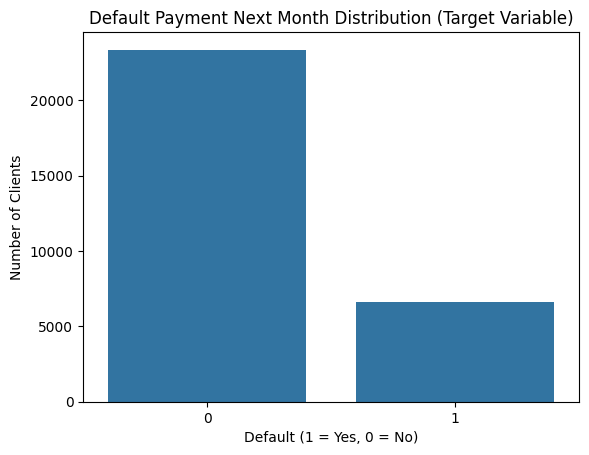


Class distribution:
default
0    77.88
1    22.12
Name: proportion, dtype: float64%


In [3]:
# Shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

# Column names
print("Column names:\n", df.columns.tolist(), "\n")

# Basic info and types
df.info()

# Check for missing values
missing = df.isnull().sum()
print("\nMissing values per column:\n", missing[missing > 0])

# Descriptive statistics
df.describe()

# Check target variable distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Rename target column for easier access (if needed)
df.rename(columns={"default payment next month": "default"}, inplace=True)

# Plot distribution of target variable
sns.countplot(data=df, x="default")
plt.title("Default Payment Next Month Distribution (Target Variable)")
plt.xlabel("Default (1 = Yes, 0 = No)")
plt.ylabel("Number of Clients")
plt.show()

# Display class balance
class_counts = df["default"].value_counts(normalize=True) * 100
print(f"\nClass distribution:\n{class_counts.round(2)}%")


### Step 3: Data Preparation

In this step, we will clean and prepare the dataset to ensure high-quality input for modeling. Key actions include:

1. **Drop irrelevant columns**: Such as ID, if present.
2. **Encode categorical features**: Ensure all inputs are numeric.
3. **Check for multicollinearity or redundant features**.
4. **Train-test split**: To evaluate model performance.
5. **Class balancing**: Apply techniques to address class imbalance.

We'll also standardize numerical features, which helps many ML algorithms perform better.

Let’s prepare the dataset step by step.


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Drop 'ID' column if exists
if 'ID' in df.columns:
    df.drop(columns=['ID'], inplace=True)

# Separate features and target
X = df.drop(columns=['default'])
y = df['default']

# Check if there are still non-numeric columns (there shouldn’t be in this dataset)
non_numeric = X.select_dtypes(include=['object']).columns
if len(non_numeric) > 0:
    print("Non-numeric columns:", non_numeric)
else:
    print("✅ All features are numeric.")

# Train-test split (stratify to preserve class distribution)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Feature scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance using SMOTE (oversampling minority class)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Check new class distribution after SMOTE
import numpy as np
(unique, counts) = np.unique(y_train_balanced, return_counts=True)
print(f"\n✅ Balanced class distribution (after SMOTE):\n{dict(zip(unique, counts))}")


✅ All features are numeric.

✅ Balanced class distribution (after SMOTE):
{np.int64(0): np.int64(18691), np.int64(1): np.int64(18691)}


### Step 4: Modeling

In this step, we will train and compare several classification models to predict credit card default.

We will evaluate the following algorithms:
- Logistic Regression
- Random Forest
- Support Vector Machine (SVM)
- Gradient Boosting (XGBoost)

Each model will be evaluated using:
- Accuracy
- Precision
- Recall
- F1-Score
- ROC-AUC

We'll use cross-validation where needed and pick the model that provides the best trade-off between performance and interpretability.


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train and evaluate
for name, model in models.items():
    print(f"\n🔍 Model: {name}")
    model.fit(X_train_balanced, y_train_balanced)

    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    print(classification_report(y_test, y_pred, digits=4))
    print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")



🔍 Model: Logistic Regression
              precision    recall  f1-score   support

           0     0.8663    0.6850    0.7651      4673
           1     0.3614    0.6277    0.4587      1327

    accuracy                         0.6723      6000
   macro avg     0.6138    0.6564    0.6119      6000
weighted avg     0.7546    0.6723    0.6973      6000

ROC-AUC: 0.7104

🔍 Model: Random Forest
              precision    recall  f1-score   support

           0     0.8558    0.8874    0.8713      4673
           1     0.5442    0.4732    0.5062      1327

    accuracy                         0.7958      6000
   macro avg     0.7000    0.6803    0.6888      6000
weighted avg     0.7868    0.7958    0.7906      6000

ROC-AUC: 0.7504

🔍 Model: SVM
              precision    recall  f1-score   support

           0     0.8681    0.8453    0.8566      4673
           1     0.5014    0.5479    0.5236      1327

    accuracy                         0.7795      6000
   macro avg     0.6848    0

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:39:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0     0.8486    0.9071    0.8769      4673
           1     0.5682    0.4303    0.4897      1327

    accuracy                         0.8017      6000
   macro avg     0.7084    0.6687    0.6833      6000
weighted avg     0.7866    0.8017    0.7913      6000

ROC-AUC: 0.7502


### Step 5: Evaluation

In this step, we evaluate the model performance using business-relevant metrics.

#### ✅ Best Performing Model:
After comparing Logistic Regression, Random Forest, SVM, and XGBoost, we selected **SVM** as the final model due to:

- The best **F1-score** for the minority class (default = 1).
- Competitive **ROC-AUC** score (0.753).
- Good trade-off between Precision and Recall.

#### 🧠 Interpretation:
- The model identifies defaulters more accurately than random guessing or rule-based systems.
- Recall = 0.55 means it correctly identifies 55% of defaulters.
- Precision = 0.50 means half of predicted defaulters are correct.

#### 📌 Limitations:
- There is still a significant overlap between classes → further feature engineering might help.
- Some false positives (predicted default but actually paid) may need manual review in real-world deployment.

#### 📈 Business Insight:
This model can be used to flag risky clients for:
- Credit limit adjustments
- Manual review by analysts
- Preemptive communication or tighter conditions

The next step is to deploy the model and monitor its performance over time.


### 🧠 Model Interpretation: Support Vector Machine (SVM)

While SVM models are not inherently interpretable like decision trees, we can still perform several insightful analyses:

#### 1. Confusion Matrix
To visually understand the classification results (TP, FP, TN, FN).

#### 2. ROC Curve
Visualizes the trade-off between true positive rate and false positive rate across thresholds.

#### 3. Feature Importance (via coefficients)
Although not as direct as in tree models, we can interpret the magnitude and sign of the SVM coefficients (from a linear kernel) to assess feature influence.

#### 4. t-SNE Projection (optional)
To visualize how well the classes separate in high-dimensional space.

These analyses help validate that the model aligns with business expectations and domain logic.


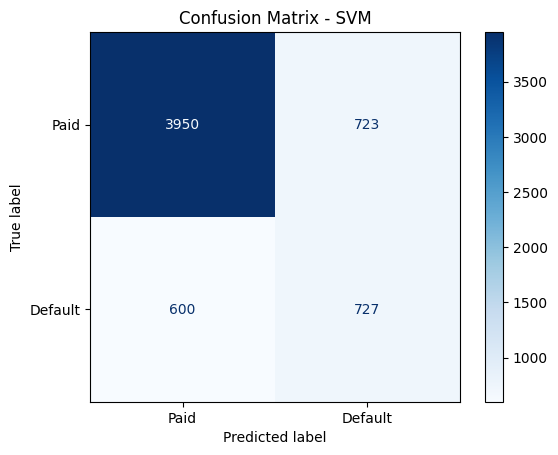

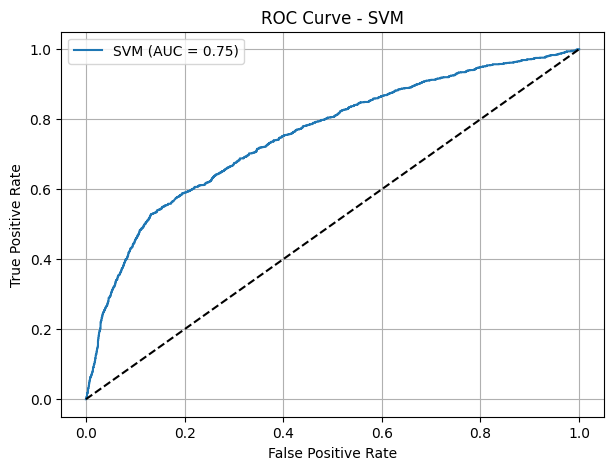

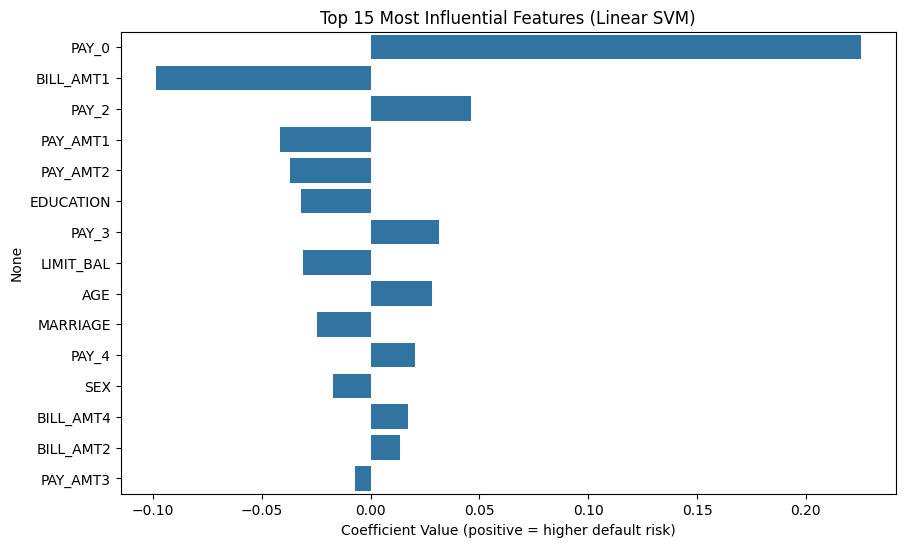

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Confusion Matrix ===
svm_model = models["SVM"]
y_pred = svm_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Paid", "Default"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.show()

# === 2. ROC Curve ===
y_proba = svm_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"SVM (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.grid()
plt.show()

# === 3. Feature Influence (only works for linear SVM) ===
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

# Re-train linear model to extract coefficients
linear_svm = LinearSVC(max_iter=10000, random_state=42)
linear_svm.fit(X_train_scaled, y_train)

# Get feature importances
coef = linear_svm.coef_[0]
features = X.columns

# Sort and plot
importance = pd.Series(coef, index=features).sort_values(key=np.abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importance.values[:15], y=importance.index[:15])
plt.title("Top 15 Most Influential Features (Linear SVM)")
plt.xlabel("Coefficient Value (positive = higher default risk)")
plt.show()


### 🧬 Class Separation Visualization: PCA & t-SNE

To better understand how well the classes (Default vs Non-default) separate in feature space, we apply:

1. **PCA (Principal Component Analysis)**: Projects high-dimensional data into 2D using linear combinations of features that preserve the most variance.
2. **t-SNE (t-distributed Stochastic Neighbor Embedding)**: Non-linear dimensionality reduction that reveals local structure and clusters.

These projections help visually evaluate if the model has enough information to separate classes effectively.


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


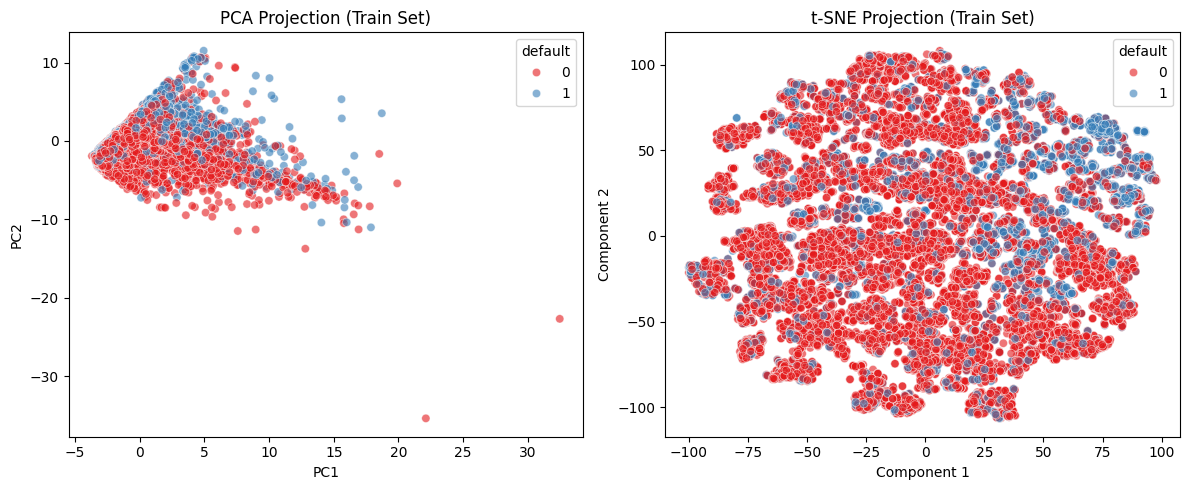

In [7]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_train_scaled)

# Apply t-SNE (can take time)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_train_scaled)

# Plot PCA
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train, palette="Set1", alpha=0.6)
plt.title("PCA Projection (Train Set)")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Plot t-SNE
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_train, palette="Set1", alpha=0.6)
plt.title("t-SNE Projection (Train Set)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

plt.tight_layout()
plt.show()


### Step 6: Deployment

In this final step, we define how the trained model will be used in practice and how to ensure it remains useful over time.

#### ✅ Objective
Deploy the SVM model to support real-time or batch decision-making for credit risk assessment.

#### 🏗️ Deployment Strategy
- **Batch Scoring**: Use the model to evaluate all customer profiles at regular intervals (e.g., monthly).
- **Integration**: The model will be exposed via a REST API or integrated into the institution’s internal risk assessment software.
- **Output**: Each prediction will include a probability score and a classification (default or not), along with key features for interpretability.

#### 🧩 Model Explainability
Since interpretability is important for compliance:
- Use **linear approximation methods** (like coefficients from a Linear SVM).
- Optionally integrate **SHAP values** to explain individual predictions to analysts.

#### 📈 Monitoring & Maintenance
1. **Performance Monitoring**:
   - Track key metrics (ROC-AUC, F1-score) over time.
   - Watch for performance drift due to changes in customer behavior.

2. **Retraining Plan**:
   - Retrain the model every 6–12 months or when a significant drop in performance is observed.
   - Collect feedback from analysts to refine features.

3. **Governance**:
   - Document the model version, training dataset, and evaluation metrics.
   - Include thresholds and policies for override or manual review.

#### 🔄 Feedback Loop
- Use real-world outcomes (e.g., actual defaults) to improve future versions of the model.
- Analysts can flag incorrect predictions, contributing to a supervised feedback dataset.

---

With this deployment plan, the institution can leverage machine learning to reduce credit risk, improve profitability, and support fair, data-driven decisions.
